**Entrega N° 1 — Data Science I: Fundamentos para la ciencia de datos**

Franco Ruiz

Análisis de Delitos en la Ciudad de Buenos Aires (2023)

**Abstract**

El presente proyecto se centra en el análisis de un conjunto de datos que contiene registros de delitos ocurridos en la Ciudad de Buenos Aires durante el año 2023. El dataset seleccionado es altamente relevante para el perfil de análisis de datos geoespaciales, ya que incluye información detallada sobre la ubicación geográfica de los hechos, su clasificación por tipo de delito, modalidad de comisión, fecha y horario, entre otras variables.

Este proyecto resulta particularmente afín a mi perfil académico y profesional: actualmente me encuentro cursando un Máster en Teledetección y Sistemas de Información Geográfica (SIG), además de contar con experiencia en el procesamiento de datos geoespaciales y su integración con herramientas de análisis de datos. Desde mi perspectiva, la incorporación de variables espaciales en el análisis de fenómenos urbanos, como la delincuencia, permite desarrollar soluciones aplicadas de alto impacto, tanto para la toma de decisiones públicas como privadas.

La base de datos, que posee aproximadamente 157.000 registros y más de 15 variables, permite no solo la exploración estadística tradicional, sino también el desarrollo de visualizaciones avanzadas, como dashboards interactivos, mapas de calor, y análisis temporales. La disponibilidad de datos espaciales habilita la construcción de mapas que identifiquen patrones de concentración delictiva por barrios o zonas específicas, abriendo la puerta a insights de valor para organismos de seguridad, aseguradoras y organizaciones urbanas.

Dentro del enfoque analítico propuesto, se buscará establecer tendencias sobre los horarios, días de la semana y barrios donde ocurren mayores incidencias delictivas. Además, se plantearán hipótesis sobre la modalidad de los delitos en función de la ubicación geográfica y del momento temporal en el que se producen.

El objetivo final es no solo describir el fenómeno delictivo de manera precisa, sino también sentar bases para posibles modelos predictivos que permitan anticipar situaciones de riesgo en la Ciudad de Buenos Aires a partir de patrones históricos.

**Características generales del dataset seleccionado**


*   Nombre: Delitos registrados en Ciudad Autónoma de Buenos Aires en 2023
*   Cantidad de columnas: 15
*   Cantidad de registros: Más de 150 mil
*   Formato: xlsx
*   Fuente: https://data.buenosaires.gob.ar/







**Preguntas de interés para consultar en el dataset**

*   ¿En dónde se concentraron la mayor cantidad de délitos?
*   ¿En qué momento del día?
*   ¿Qué tipos de délitos son los más frecuentes?
*   ¿Se pueden identificar patrones en cuánto a la dimensión temporal?
*   ¿Cuáles son los barrios más seguros? ¿Cuáles los más inseguros?








**Primera observación a los datos**

In [ ]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Cargar el archivo
ruta = '/content/drive/MyDrive/Data Science I: Fundamentos para la ciencia de datos/delitos_2023.xlsx'
df = pd.read_excel(ruta)

# Ver primeras filas
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_arma,uso_moto,barrio,comuna,latitud,longitud,cantidad
0,1,2023,enero,LUN,2023-01-02,19,Vialidad,Muertes por siniestros viales,NO,NO,BELGRANO,13,-58445747,-34559570,1
1,2,2023,enero,MIE,2023-01-11,11,Vialidad,Muertes por siniestros viales,NO,NO,VILLA LUGANO,8,-58476557,-34673096,1
2,3,2023,enero,VIE,2023-01-13,4,Vialidad,Muertes por siniestros viales,NO,NO,SAAVEDRA,12,-58485670,-34544011,1
3,4,2023,enero,VIE,2023-01-13,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58451874,-34636364,1
4,5,2023,enero,VIE,2023-01-13,6,Vialidad,Muertes por siniestros viales,NO,NO,PARQUE CHACABUCO,7,-58451874,-34636364,1


<ipython-input-10-1e12de6edfd8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delitos_por_mes.index, y=delitos_por_mes.values, palette="viridis")


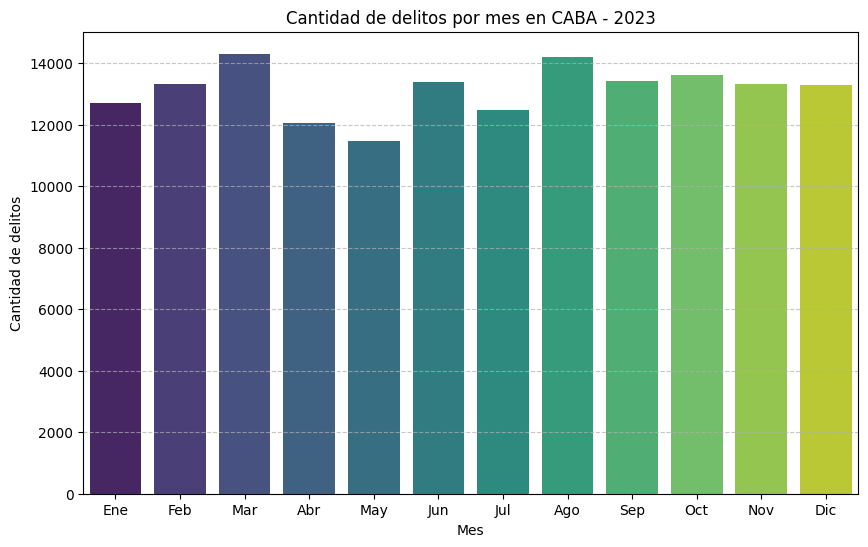

In [ ]:
# Agrupamos directamente por la columna "mes" y contamos la cantidad de delitos
delitos_por_mes = df['mes'].value_counts().sort_index()

# Graficamos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x=delitos_por_mes.index, y=delitos_por_mes.values, palette="viridis")

plt.title('Cantidad de delitos por mes en CABA - 2023')
plt.xlabel('Mes')
plt.ylabel('Cantidad de delitos')
plt.xticks(ticks=range(0,12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Creamos un DataFrame resumen
tabla_delitos_mes = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
            'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    'Cantidad de delitos': delitos_por_mes.values
})

# Mostramos la tabla
tabla_delitos_mes


,Mes,Cantidad de delitos
0,Enero,12690
1,Febrero,13312
2,Marzo,14301
3,Abril,12037
4,Mayo,11475
5,Junio,13383
6,Julio,12469
7,Agosto,14180
8,Septiembre,13425
9,Octubre,13598


<ipython-input-12-6f6282479207>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delitos_por_tipo.values, y=delitos_por_tipo.index, palette="magma")


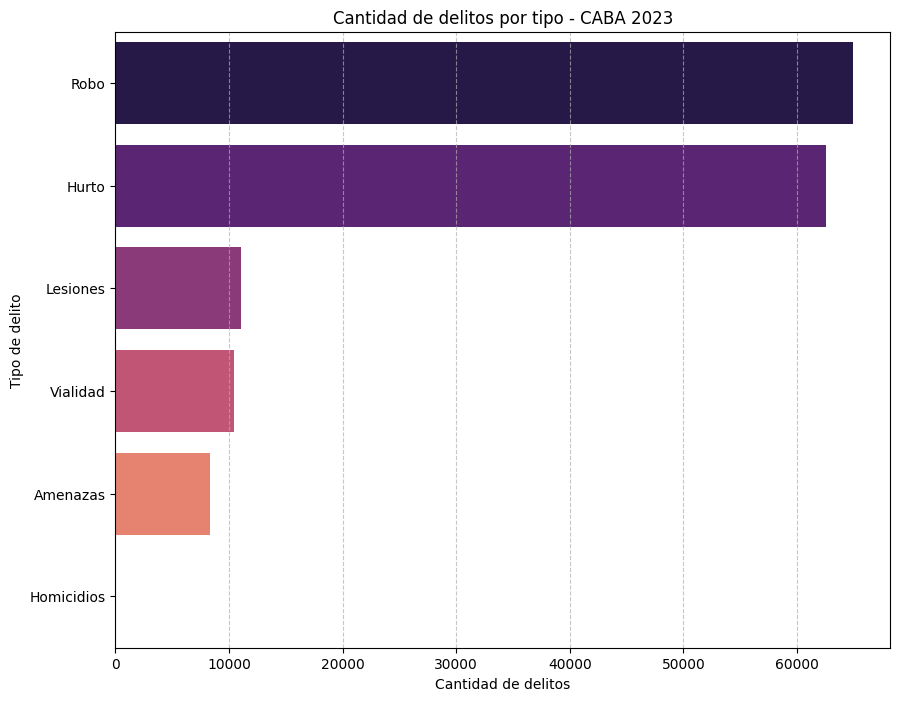

In [12]:
# Agrupamos por tipo de delito y contamos
delitos_por_tipo = df['tipo'].value_counts()

# Graficamos
plt.figure(figsize=(10,8))
sns.barplot(x=delitos_por_tipo.values, y=delitos_por_tipo.index, palette="magma")

plt.title('Cantidad de delitos por tipo - CABA 2023')
plt.xlabel('Cantidad de delitos')
plt.ylabel('Tipo de delito')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Es necesario distinguir la diferencia entre hurto y robo:


*   Se define al hurto como sustraer algo ajeno sin violencia/intimidación hacia la persona. Es decir, no hay fuerza física.
*   En cambio, el robo utiliza la violencia física y la intimidación. Por ende, es un delito más peligroso.

